In [1]:
from keras.layers import Input, Dense, Conv2D, Flatten, Activation, BatchNormalization, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import itertools
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
get_ipython().run_line_magic('matplotlib', 'inline')
from collections import defaultdict
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn import metrics
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
data_x =  np.array([[1,1],[1,0],[0,1],[0,0]])
data_y =  np.array([[0],[1],[1],[0]])

In [3]:
data_x.shape

(4, 2)

In [4]:
def get_model():
    inputs = Input(shape=(2,))

    # a layer instance is callable on a tensor, and returns a tensor
    x = Dense(3, activation='sigmoid')(inputs)
    predictions = Dense(1, activation='sigmoid')(x)

    # This creates a model that includes
    # the Input layer and three Dense layers
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

In [5]:
model = get_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [6]:
h = model.fit(x=data_x, y=data_y, epochs=4000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/4000
4/4 [==============================] - 2s 496ms/step - loss: 0.7037 - acc: 0.5000
Epoch 2/4000
4/4 [==============================] - 0s 997us/step - loss: 0.7034 - acc: 0.5000
Epoch 3/4000
4/4 [==============================] - 0s 996us/step - loss: 0.7032 - acc: 0.5000
Epoch 4/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.7029 - acc: 0.5000
Epoch 5/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.7027 - acc: 0.5000
Epoch 6/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.7024 - acc: 0.5000
Epoch 7/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.7022 - acc: 0.5000
Epoch 8/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.7020 - acc: 0.5000
Epoch 9/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.7017 - acc: 0.5000
Epoch 10/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.7015 - acc: 0.5000
Epoch 11/4000
4

Epoch 86/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6940 - acc: 0.2500
Epoch 87/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6939 - acc: 0.2500
Epoch 88/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6939 - acc: 0.2500
Epoch 89/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6939 - acc: 0.2500
Epoch 90/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6939 - acc: 0.5000
Epoch 91/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6939 - acc: 0.5000
Epoch 92/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6939 - acc: 0.5000
Epoch 93/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6939 - acc: 0.5000
Epoch 94/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6938 - acc: 0.5000
Epoch 95/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6938 - acc: 0.5000
Epoch 96/4000
4/4 [==============================]

Epoch 173/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6934 - acc: 0.5000
Epoch 174/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6934 - acc: 0.5000
Epoch 175/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6934 - acc: 0.5000
Epoch 176/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6934 - acc: 0.5000
Epoch 177/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6934 - acc: 0.5000
Epoch 178/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6934 - acc: 0.5000
Epoch 179/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6934 - acc: 0.5000
Epoch 180/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6934 - acc: 0.5000
Epoch 181/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6934 - acc: 0.5000
Epoch 182/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6934 - acc: 0.5000
Epoch 183/4000
4/4 [==========================

Epoch 259/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6931 - acc: 0.5000
Epoch 260/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6931 - acc: 0.5000
Epoch 261/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6931 - acc: 0.5000
Epoch 262/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6931 - acc: 0.5000
Epoch 263/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6931 - acc: 0.5000
Epoch 264/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6931 - acc: 0.5000
Epoch 265/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6931 - acc: 0.5000
Epoch 266/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6931 - acc: 0.5000
Epoch 267/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6931 - acc: 0.5000
Epoch 268/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6931 - acc: 0.5000
Epoch 269/4000
4/4 [==========

Epoch 344/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6927 - acc: 0.5000
Epoch 345/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6927 - acc: 0.5000
Epoch 346/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6927 - acc: 0.5000
Epoch 347/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6927 - acc: 0.5000
Epoch 348/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6927 - acc: 0.5000
Epoch 349/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6927 - acc: 0.5000
Epoch 350/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6927 - acc: 0.5000
Epoch 351/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6927 - acc: 0.5000
Epoch 352/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6927 - acc: 0.5000
Epoch 353/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6927 - acc: 0.5000
Epoch 354/4000
4/4 [==============

Epoch 429/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6922 - acc: 0.7500
Epoch 430/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6922 - acc: 0.7500
Epoch 431/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6922 - acc: 0.7500
Epoch 432/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6922 - acc: 0.7500
Epoch 433/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6922 - acc: 0.7500
Epoch 434/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6922 - acc: 0.7500
Epoch 435/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6922 - acc: 0.7500
Epoch 436/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6922 - acc: 0.7500
Epoch 437/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6922 - acc: 0.7500
Epoch 438/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6922 - acc: 0.7500
Epoch 439/4000
4/4 [==============

Epoch 514/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6916 - acc: 0.7500
Epoch 515/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6915 - acc: 0.7500
Epoch 516/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6915 - acc: 0.7500
Epoch 517/4000
4/4 [==============================] - 0s 996us/step - loss: 0.6915 - acc: 0.7500
Epoch 518/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6915 - acc: 0.7500
Epoch 519/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6915 - acc: 0.7500
Epoch 520/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6915 - acc: 0.7500
Epoch 521/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6915 - acc: 0.7500
Epoch 522/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6915 - acc: 0.7500
Epoch 523/4000
4/4 [==============================] - 0s 747us/step - loss: 0.6915 - acc: 0.7500
Epoch 524/4000
4/4 [============

Epoch 600/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6905 - acc: 0.5000
Epoch 601/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6905 - acc: 0.5000
Epoch 602/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6905 - acc: 0.5000
Epoch 603/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6905 - acc: 0.5000
Epoch 604/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6905 - acc: 0.5000
Epoch 605/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6904 - acc: 0.5000
Epoch 606/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6904 - acc: 0.5000
Epoch 607/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6904 - acc: 0.5000
Epoch 608/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6904 - acc: 0.5000
Epoch 609/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6904 - acc: 0.5000
Epoch 610/4000
4/4 [============================

Epoch 686/4000
4/4 [==============================] - 0s 996us/step - loss: 0.6888 - acc: 0.5000
Epoch 687/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6888 - acc: 0.5000
Epoch 688/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6888 - acc: 0.5000
Epoch 689/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6888 - acc: 0.5000
Epoch 690/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6887 - acc: 0.5000
Epoch 691/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6887 - acc: 0.5000
Epoch 692/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6887 - acc: 0.5000
Epoch 693/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6887 - acc: 0.5000
Epoch 694/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6886 - acc: 0.5000
Epoch 695/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6886 - acc: 0.5000
Epoch 696/4000
4/4 [==================

Epoch 772/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6860 - acc: 0.5000
Epoch 773/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6860 - acc: 0.5000
Epoch 774/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6859 - acc: 0.5000
Epoch 775/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6859 - acc: 0.5000
Epoch 776/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6858 - acc: 0.5000
Epoch 777/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6858 - acc: 0.5000
Epoch 778/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6857 - acc: 0.5000
Epoch 779/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6857 - acc: 0.5000
Epoch 780/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6857 - acc: 0.5000
Epoch 781/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6856 - acc: 0.5000
Epoch 782/4000
4/4 [==================

Epoch 858/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6813 - acc: 0.5000
Epoch 859/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6812 - acc: 0.5000
Epoch 860/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6811 - acc: 0.5000
Epoch 861/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6811 - acc: 0.5000
Epoch 862/4000
4/4 [==============================] - 0s 996us/step - loss: 0.6810 - acc: 0.5000
Epoch 863/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6809 - acc: 0.5000
Epoch 864/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6809 - acc: 0.5000
Epoch 865/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6808 - acc: 0.5000
Epoch 866/4000
4/4 [==============================] - 0s 996us/step - loss: 0.6807 - acc: 0.5000
Epoch 867/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6806 - acc: 0.5000
Epoch 868/4000
4/4 [======================

Epoch 944/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6737 - acc: 0.7500
Epoch 945/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6736 - acc: 0.7500
Epoch 946/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6735 - acc: 0.7500
Epoch 947/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6734 - acc: 0.7500
Epoch 948/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6733 - acc: 0.7500
Epoch 949/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6732 - acc: 0.7500
Epoch 950/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6731 - acc: 0.7500
Epoch 951/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6730 - acc: 0.7500
Epoch 952/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6728 - acc: 0.7500
Epoch 953/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6727 - acc: 0.7500
Epoch 954/4000
4/4 [====================

Epoch 1030/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6624 - acc: 0.7500
Epoch 1031/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6622 - acc: 0.7500
Epoch 1032/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6621 - acc: 0.7500
Epoch 1033/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6619 - acc: 0.7500
Epoch 1034/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6618 - acc: 0.7500
Epoch 1035/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6616 - acc: 0.7500
Epoch 1036/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6615 - acc: 0.7500
Epoch 1037/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6613 - acc: 0.7500
Epoch 1038/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6611 - acc: 0.7500
Epoch 1039/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6610 - acc: 0.7500
Epoch 1040/4000
4/4 [===============

Epoch 1115/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6471 - acc: 1.0000
Epoch 1116/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6469 - acc: 1.0000
Epoch 1117/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6467 - acc: 1.0000
Epoch 1118/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6465 - acc: 1.0000
Epoch 1119/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6463 - acc: 1.0000
Epoch 1120/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6461 - acc: 1.0000
Epoch 1121/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6459 - acc: 1.0000
Epoch 1122/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6457 - acc: 1.0000
Epoch 1123/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6455 - acc: 1.0000
Epoch 1124/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6453 - acc: 1.0000
Epoch 1125/4000
4/4 [=============

Epoch 1200/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6280 - acc: 1.0000
Epoch 1201/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6278 - acc: 1.0000
Epoch 1202/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6276 - acc: 1.0000
Epoch 1203/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6273 - acc: 1.0000
Epoch 1204/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6271 - acc: 1.0000
Epoch 1205/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6268 - acc: 1.0000
Epoch 1206/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6266 - acc: 1.0000
Epoch 1207/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6263 - acc: 1.0000
Epoch 1208/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6261 - acc: 1.0000
Epoch 1209/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6258 - acc: 1.0000
Epoch 1210/4000
4/4 [=================

Epoch 1285/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6059 - acc: 1.0000
Epoch 1286/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6057 - acc: 1.0000
Epoch 1287/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6054 - acc: 1.0000
Epoch 1288/4000
4/4 [==============================] - 0s 998us/step - loss: 0.6051 - acc: 1.0000
Epoch 1289/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6048 - acc: 1.0000
Epoch 1290/4000
4/4 [==============================] - 0s 748us/step - loss: 0.6046 - acc: 1.0000
Epoch 1291/4000
4/4 [==============================] - 0s 997us/step - loss: 0.6043 - acc: 1.0000
Epoch 1292/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6040 - acc: 1.0000
Epoch 1293/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6037 - acc: 1.0000
Epoch 1294/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6035 - acc: 1.0000
Epoch 1295/4000
4/4 [=========

Epoch 1370/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5819 - acc: 1.0000
Epoch 1371/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5816 - acc: 1.0000
Epoch 1372/4000
4/4 [==============================] - 0s 997us/step - loss: 0.5813 - acc: 1.0000
Epoch 1373/4000
4/4 [==============================] - 0s 748us/step - loss: 0.5810 - acc: 1.0000
Epoch 1374/4000
4/4 [==============================] - 0s 998us/step - loss: 0.5807 - acc: 1.0000
Epoch 1375/4000
4/4 [==============================] - 0s 997us/step - loss: 0.5804 - acc: 1.0000
Epoch 1376/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5801 - acc: 1.0000
Epoch 1377/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5799 - acc: 1.0000
Epoch 1378/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5796 - acc: 1.0000
Epoch 1379/4000
4/4 [==============================] - 0s 998us/step - loss: 0.5793 - acc: 1.0000
Epoch 1380/4000
4/4 [=========

Epoch 1455/4000
4/4 [==============================] - 0s 999us/step - loss: 0.5569 - acc: 1.0000
Epoch 1456/4000
4/4 [==============================] - 0s 997us/step - loss: 0.5566 - acc: 1.0000
Epoch 1457/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5563 - acc: 1.0000
Epoch 1458/4000
4/4 [==============================] - 0s 997us/step - loss: 0.5560 - acc: 1.0000
Epoch 1459/4000
4/4 [==============================] - 0s 996us/step - loss: 0.5557 - acc: 1.0000
Epoch 1460/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5554 - acc: 1.0000
Epoch 1461/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5551 - acc: 1.0000
Epoch 1462/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.5548 - acc: 1.0000
Epoch 1463/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5545 - acc: 1.0000
Epoch 1464/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.5542 - acc: 1.0000
Epoch 1465/4000
4/4 [===========

Epoch 1540/4000
4/4 [==============================] - 0s 748us/step - loss: 0.5317 - acc: 1.0000
Epoch 1541/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5314 - acc: 1.0000
Epoch 1542/4000
4/4 [==============================] - 0s 748us/step - loss: 0.5311 - acc: 1.0000
Epoch 1543/4000
4/4 [==============================] - 0s 998us/step - loss: 0.5308 - acc: 1.0000
Epoch 1544/4000
4/4 [==============================] - 0s 998us/step - loss: 0.5305 - acc: 1.0000
Epoch 1545/4000
4/4 [==============================] - 0s 997us/step - loss: 0.5302 - acc: 1.0000
Epoch 1546/4000
4/4 [==============================] - 0s 748us/step - loss: 0.5299 - acc: 1.0000
Epoch 1547/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5296 - acc: 1.0000
Epoch 1548/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.5293 - acc: 1.0000
Epoch 1549/4000
4/4 [==============================] - 0s 998us/step - loss: 0.5290 - acc: 1.0000
Epoch 1550/4000
4/4 [=====

Epoch 1625/4000
4/4 [==============================] - 0s 748us/step - loss: 0.5067 - acc: 1.0000
Epoch 1626/4000
4/4 [==============================] - 0s 748us/step - loss: 0.5064 - acc: 1.0000
Epoch 1627/4000
4/4 [==============================] - 0s 748us/step - loss: 0.5061 - acc: 1.0000
Epoch 1628/4000
4/4 [==============================] - 0s 997us/step - loss: 0.5058 - acc: 1.0000
Epoch 1629/4000
4/4 [==============================] - 0s 997us/step - loss: 0.5055 - acc: 1.0000
Epoch 1630/4000
4/4 [==============================] - 0s 748us/step - loss: 0.5052 - acc: 1.0000
Epoch 1631/4000
4/4 [==============================] - 0s 748us/step - loss: 0.5049 - acc: 1.0000
Epoch 1632/4000
4/4 [==============================] - 0s 748us/step - loss: 0.5046 - acc: 1.0000
Epoch 1633/4000
4/4 [==============================] - 0s 748us/step - loss: 0.5043 - acc: 1.0000
Epoch 1634/4000
4/4 [==============================] - 0s 997us/step - loss: 0.5040 - acc: 1.0000
Epoch 1635/4000
4/4 

Epoch 1710/4000
4/4 [==============================] - 0s 997us/step - loss: 0.4820 - acc: 1.0000
Epoch 1711/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4817 - acc: 1.0000
Epoch 1712/4000
4/4 [==============================] - 0s 997us/step - loss: 0.4814 - acc: 1.0000
Epoch 1713/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4812 - acc: 1.0000
Epoch 1714/4000
4/4 [==============================] - 0s 997us/step - loss: 0.4809 - acc: 1.0000
Epoch 1715/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4806 - acc: 1.0000
Epoch 1716/4000
4/4 [==============================] - 0s 997us/step - loss: 0.4803 - acc: 1.0000
Epoch 1717/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.4800 - acc: 1.0000
Epoch 1718/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.4797 - acc: 1.0000
Epoch 1719/4000
4/4 [==============================] - 0s 998us/step - loss: 0.4794 - acc: 1.0000
Epoch 1720/4000
4/4 [===

Epoch 1795/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.4572 - acc: 1.0000
Epoch 1796/4000
4/4 [==============================] - 0s 997us/step - loss: 0.4569 - acc: 1.0000
Epoch 1797/4000
4/4 [==============================] - 0s 997us/step - loss: 0.4566 - acc: 1.0000
Epoch 1798/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4563 - acc: 1.0000
Epoch 1799/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4560 - acc: 1.0000
Epoch 1800/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4557 - acc: 1.0000
Epoch 1801/4000
4/4 [==============================] - 0s 997us/step - loss: 0.4554 - acc: 1.0000
Epoch 1802/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4551 - acc: 1.0000
Epoch 1803/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.4548 - acc: 1.0000
Epoch 1804/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.4545 - acc: 1.0000
Epoch 1805/4000
4/4 [=====

Epoch 1880/4000
4/4 [==============================] - 0s 997us/step - loss: 0.4312 - acc: 1.0000
Epoch 1881/4000
4/4 [==============================] - 0s 998us/step - loss: 0.4309 - acc: 1.0000
Epoch 1882/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.4306 - acc: 1.0000
Epoch 1883/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4303 - acc: 1.0000
Epoch 1884/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4300 - acc: 1.0000
Epoch 1885/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4296 - acc: 1.0000
Epoch 1886/4000
4/4 [==============================] - 0s 997us/step - loss: 0.4293 - acc: 1.0000
Epoch 1887/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.4290 - acc: 1.0000
Epoch 1888/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.4287 - acc: 1.0000
Epoch 1889/4000
4/4 [==============================] - 0s 992us/step - loss: 0.4284 - acc: 1.0000
Epoch 1890/4000
4/4 [=====

Epoch 1965/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4061 - acc: 1.0000
Epoch 1966/4000
4/4 [==============================] - 0s 998us/step - loss: 0.4058 - acc: 1.0000
Epoch 1967/4000
4/4 [==============================] - 0s 998us/step - loss: 0.4055 - acc: 1.0000
Epoch 1968/4000
4/4 [==============================] - 0s 998us/step - loss: 0.4053 - acc: 1.0000
Epoch 1969/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.4050 - acc: 1.0000
Epoch 1970/4000
4/4 [==============================] - 0s 987us/step - loss: 0.4047 - acc: 1.0000
Epoch 1971/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4044 - acc: 1.0000
Epoch 1972/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4041 - acc: 1.0000
Epoch 1973/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4038 - acc: 1.0000
Epoch 1974/4000
4/4 [==============================] - 0s 748us/step - loss: 0.4036 - acc: 1.0000
Epoch 1975/4000
4/4 [=

Epoch 2050/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3827 - acc: 1.0000
Epoch 2051/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.3825 - acc: 1.0000
Epoch 2052/4000
4/4 [==============================] - 0s 748us/step - loss: 0.3822 - acc: 1.0000
Epoch 2053/4000
4/4 [==============================] - 0s 998us/step - loss: 0.3819 - acc: 1.0000
Epoch 2054/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3817 - acc: 1.0000
Epoch 2055/4000
4/4 [==============================] - 0s 748us/step - loss: 0.3814 - acc: 1.0000
Epoch 2056/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3811 - acc: 1.0000
Epoch 2057/4000
4/4 [==============================] - 0s 996us/step - loss: 0.3809 - acc: 1.0000
Epoch 2058/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3806 - acc: 1.0000
Epoch 2059/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3803 - acc: 1.0000
Epoch 2060/4000
4/4 [=====

Epoch 2135/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3607 - acc: 1.0000
Epoch 2136/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3605 - acc: 1.0000
Epoch 2137/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3602 - acc: 1.0000
Epoch 2138/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3600 - acc: 1.0000
Epoch 2139/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3597 - acc: 1.0000
Epoch 2140/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3594 - acc: 1.0000
Epoch 2141/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3592 - acc: 1.0000
Epoch 2142/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3589 - acc: 1.0000
Epoch 2143/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3587 - acc: 1.0000
Epoch 2144/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.3584 - acc: 1.0000
Epoch 2145/4000
4/4 [=========

Epoch 2220/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3399 - acc: 1.0000
Epoch 2221/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3397 - acc: 1.0000
Epoch 2222/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3395 - acc: 1.0000
Epoch 2223/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3392 - acc: 1.0000
Epoch 2224/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3390 - acc: 1.0000
Epoch 2225/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3387 - acc: 1.0000
Epoch 2226/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3385 - acc: 1.0000
Epoch 2227/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.3383 - acc: 1.0000
Epoch 2228/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3380 - acc: 1.0000
Epoch 2229/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3378 - acc: 1.0000
Epoch 2230/4000
4/4 [=============

Epoch 2305/4000
4/4 [==============================] - 0s 748us/step - loss: 0.3204 - acc: 1.0000
Epoch 2306/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3202 - acc: 1.0000
Epoch 2307/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3200 - acc: 1.0000
Epoch 2308/4000
4/4 [==============================] - 0s 998us/step - loss: 0.3198 - acc: 1.0000
Epoch 2309/4000
4/4 [==============================] - 0s 748us/step - loss: 0.3196 - acc: 1.0000
Epoch 2310/4000
4/4 [==============================] - 0s 748us/step - loss: 0.3193 - acc: 1.0000
Epoch 2311/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3191 - acc: 1.0000
Epoch 2312/4000
4/4 [==============================] - 0s 748us/step - loss: 0.3189 - acc: 1.0000
Epoch 2313/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3187 - acc: 1.0000
Epoch 2314/4000
4/4 [==============================] - 0s 998us/step - loss: 0.3184 - acc: 1.0000
Epoch 2315/4000
4/4 [=

Epoch 2390/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3023 - acc: 1.0000
Epoch 2391/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3021 - acc: 1.0000
Epoch 2392/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3018 - acc: 1.0000
Epoch 2393/4000
4/4 [==============================] - 0s 748us/step - loss: 0.3016 - acc: 1.0000
Epoch 2394/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3014 - acc: 1.0000
Epoch 2395/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.3012 - acc: 1.0000
Epoch 2396/4000
4/4 [==============================] - 0s 998us/step - loss: 0.3010 - acc: 1.0000
Epoch 2397/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3008 - acc: 1.0000
Epoch 2398/4000
4/4 [==============================] - 0s 997us/step - loss: 0.3006 - acc: 1.0000
Epoch 2399/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.3004 - acc: 1.0000
Epoch 2400/4000
4/4 [===========

Epoch 2475/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2854 - acc: 1.0000
Epoch 2476/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2852 - acc: 1.0000
Epoch 2477/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2850 - acc: 1.0000
Epoch 2478/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2848 - acc: 1.0000
Epoch 2479/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2846 - acc: 1.0000
Epoch 2480/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2844 - acc: 1.0000
Epoch 2481/4000
4/4 [==============================] - 0s 998us/step - loss: 0.2842 - acc: 1.0000
Epoch 2482/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2840 - acc: 1.0000
Epoch 2483/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2838 - acc: 1.0000
Epoch 2484/4000
4/4 [==============================] - 0s 995us/step - loss: 0.2836 - acc: 1.0000
Epoch 2485/4000
4/4 [=====

Epoch 2560/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2697 - acc: 1.0000
Epoch 2561/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2695 - acc: 1.0000
Epoch 2562/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2693 - acc: 1.0000
Epoch 2563/4000
4/4 [==============================] - 0s 998us/step - loss: 0.2691 - acc: 1.0000
Epoch 2564/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2690 - acc: 1.0000
Epoch 2565/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2688 - acc: 1.0000
Epoch 2566/4000
4/4 [==============================] - 0s 998us/step - loss: 0.2686 - acc: 1.0000
Epoch 2567/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2684 - acc: 1.0000
Epoch 2568/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2683 - acc: 1.0000
Epoch 2569/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2681 - acc: 1.0000
Epoch 2570/4000
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.2553 - acc: 1.0000
Epoch 2645/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2551 - acc: 1.0000
Epoch 2646/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2550 - acc: 1.0000
Epoch 2647/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2548 - acc: 1.0000
Epoch 2648/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2546 - acc: 1.0000
Epoch 2649/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2545 - acc: 1.0000
Epoch 2650/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2543 - acc: 1.0000
Epoch 2651/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2542 - acc: 1.0000
Epoch 2652/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2540 - acc: 1.0000
Epoch 2653/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2538 - acc: 1.0000
Epoch 2654/4000
4/4 [=========================

Epoch 2729/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2418 - acc: 1.0000
Epoch 2730/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2417 - acc: 1.0000
Epoch 2731/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2415 - acc: 1.0000
Epoch 2732/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2414 - acc: 1.0000
Epoch 2733/4000
4/4 [==============================] - 0s 999us/step - loss: 0.2412 - acc: 1.0000
Epoch 2734/4000
4/4 [==============================] - 0s 996us/step - loss: 0.2411 - acc: 1.0000
Epoch 2735/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2409 - acc: 1.0000
Epoch 2736/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2408 - acc: 1.0000
Epoch 2737/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2406 - acc: 1.0000
Epoch 2738/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404 - acc: 1.0000
Epoch 2739/4000
4/4 [=====

Epoch 2814/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2293 - acc: 1.0000
Epoch 2815/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2292 - acc: 1.0000
Epoch 2816/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2290 - acc: 1.0000
Epoch 2817/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2289 - acc: 1.0000
Epoch 2818/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2287 - acc: 1.0000
Epoch 2819/4000
4/4 [==============================] - 0s 998us/step - loss: 0.2286 - acc: 1.0000
Epoch 2820/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2285 - acc: 1.0000
Epoch 2821/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2283 - acc: 1.0000
Epoch 2822/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2282 - acc: 1.0000
Epoch 2823/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2280 - acc: 1.0000
Epoch 2824/4000
4/4 [=========

Epoch 2899/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2177 - acc: 1.0000
Epoch 2900/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2175 - acc: 1.0000
Epoch 2901/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2174 - acc: 1.0000
Epoch 2902/4000
4/4 [==============================] - 0s 998us/step - loss: 0.2173 - acc: 1.0000
Epoch 2903/4000
4/4 [==============================] - 0s 998us/step - loss: 0.2172 - acc: 1.0000
Epoch 2904/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2170 - acc: 1.0000
Epoch 2905/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2169 - acc: 1.0000
Epoch 2906/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2168 - acc: 1.0000
Epoch 2907/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2166 - acc: 1.0000
Epoch 2908/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2165 - acc: 1.0000
Epoch 2909/4000
4/4 [=========

Epoch 2984/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2069 - acc: 1.0000
Epoch 2985/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2067 - acc: 1.0000
Epoch 2986/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2066 - acc: 1.0000
Epoch 2987/4000
4/4 [==============================] - 0s 748us/step - loss: 0.2065 - acc: 1.0000
Epoch 2988/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2064 - acc: 1.0000
Epoch 2989/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2063 - acc: 1.0000
Epoch 2990/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2061 - acc: 1.0000
Epoch 2991/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2060 - acc: 1.0000
Epoch 2992/4000
4/4 [==============================] - 0s 997us/step - loss: 0.2059 - acc: 1.0000
Epoch 2993/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2058 - acc: 1.0000
Epoch 2994/4000
4/4 [=======

Epoch 3069/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.1968 - acc: 1.0000
Epoch 3070/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1967 - acc: 1.0000
Epoch 3071/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1966 - acc: 1.0000
Epoch 3072/4000
4/4 [==============================] - 0s 998us/step - loss: 0.1965 - acc: 1.0000
Epoch 3073/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1963 - acc: 1.0000
Epoch 3074/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1962 - acc: 1.0000
Epoch 3075/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1961 - acc: 1.0000
Epoch 3076/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1960 - acc: 1.0000
Epoch 3077/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1959 - acc: 1.0000
Epoch 3078/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1958 - acc: 1.0000
Epoch 3079/4000
4/4 [=====

Epoch 3154/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1874 - acc: 1.0000
Epoch 3155/4000
4/4 [==============================] - 0s 998us/step - loss: 0.1873 - acc: 1.0000
Epoch 3156/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1872 - acc: 1.0000
Epoch 3157/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1871 - acc: 1.0000
Epoch 3158/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1870 - acc: 1.0000
Epoch 3159/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1869 - acc: 1.0000
Epoch 3160/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1868 - acc: 1.0000
Epoch 3161/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1867 - acc: 1.0000
Epoch 3162/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1866 - acc: 1.0000
Epoch 3163/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1865 - acc: 1.0000
Epoch 3164/4000
4/4 

Epoch 3239/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.1786 - acc: 1.0000
Epoch 3240/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1785 - acc: 1.0000
Epoch 3241/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1784 - acc: 1.0000
Epoch 3242/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1783 - acc: 1.0000
Epoch 3243/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.1782 - acc: 1.0000
Epoch 3244/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1781 - acc: 1.0000
Epoch 3245/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1781 - acc: 1.0000
Epoch 3246/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1780 - acc: 1.0000
Epoch 3247/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1779 - acc: 1.0000
Epoch 3248/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1778 - acc: 1.0000
Epoch 3249/4000
4/4 [===============

Epoch 3324/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1704 - acc: 1.0000
Epoch 3325/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1703 - acc: 1.0000
Epoch 3326/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1703 - acc: 1.0000
Epoch 3327/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1702 - acc: 1.0000
Epoch 3328/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1701 - acc: 1.0000
Epoch 3329/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1700 - acc: 1.0000
Epoch 3330/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1699 - acc: 1.0000
Epoch 3331/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1698 - acc: 1.0000
Epoch 3332/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1697 - acc: 1.0000
Epoch 3333/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1696 - acc: 1.0000
Epoch 3334/4000
4/4 

Epoch 3409/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1628 - acc: 1.0000
Epoch 3410/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1627 - acc: 1.0000
Epoch 3411/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1626 - acc: 1.0000
Epoch 3412/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.1625 - acc: 1.0000
Epoch 3413/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1624 - acc: 1.0000
Epoch 3414/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1623 - acc: 1.0000
Epoch 3415/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1622 - acc: 1.0000
Epoch 3416/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1621 - acc: 1.0000
Epoch 3417/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1621 - acc: 1.0000
Epoch 3418/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1620 - acc: 1.0000
Epoch 3419/4000
4/4 [=====

Epoch 3494/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1555 - acc: 1.0000
Epoch 3495/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1555 - acc: 1.0000
Epoch 3496/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1554 - acc: 1.0000
Epoch 3497/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1553 - acc: 1.0000
Epoch 3498/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1552 - acc: 1.0000
Epoch 3499/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1551 - acc: 1.0000
Epoch 3500/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1550 - acc: 1.0000
Epoch 3501/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1550 - acc: 1.0000
Epoch 3502/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1549 - acc: 1.0000
Epoch 3503/4000
4/4 [==============================] - 0s 998us/step - loss: 0.1548 - acc: 1.0000
Epoch 3504/4000
4/4 [=

Epoch 3579/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1488 - acc: 1.0000
Epoch 3580/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1487 - acc: 1.0000
Epoch 3581/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1486 - acc: 1.0000
Epoch 3582/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1485 - acc: 1.0000
Epoch 3583/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1484 - acc: 1.0000
Epoch 3584/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1484 - acc: 1.0000
Epoch 3585/4000
4/4 [==============================] - 0s 996us/step - loss: 0.1483 - acc: 1.0000
Epoch 3586/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1482 - acc: 1.0000
Epoch 3587/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1481 - acc: 1.0000
Epoch 3588/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1481 - acc: 1.0000
Epoch 3589/4000
4/4 [=========

Epoch 3664/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1424 - acc: 1.0000
Epoch 3665/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.1423 - acc: 1.0000
Epoch 3666/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1422 - acc: 1.0000
Epoch 3667/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1422 - acc: 1.0000
Epoch 3668/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1421 - acc: 1.0000
Epoch 3669/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.1420 - acc: 1.0000
Epoch 3670/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1419 - acc: 1.0000
Epoch 3671/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1419 - acc: 1.0000
Epoch 3672/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1418 - acc: 1.0000
Epoch 3673/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.1417 - acc: 1.0000
Epoch 3674/4000
4/4 [===================

Epoch 3749/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1364 - acc: 1.0000
Epoch 3750/4000
4/4 [==============================] - 0s 998us/step - loss: 0.1363 - acc: 1.0000
Epoch 3751/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1362 - acc: 1.0000
Epoch 3752/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1361 - acc: 1.0000
Epoch 3753/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1361 - acc: 1.0000
Epoch 3754/4000
4/4 [==============================] - 0s 747us/step - loss: 0.1360 - acc: 1.0000
Epoch 3755/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1359 - acc: 1.0000
Epoch 3756/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1359 - acc: 1.0000
Epoch 3757/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1358 - acc: 1.0000
Epoch 3758/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1357 - acc: 1.0000
Epoch 3759/4000
4/4 [===

Epoch 3834/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1307 - acc: 1.0000
Epoch 3835/4000
4/4 [==============================] - 0s 998us/step - loss: 0.1306 - acc: 1.0000
Epoch 3836/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1305 - acc: 1.0000
Epoch 3837/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1305 - acc: 1.0000
Epoch 3838/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.1304 - acc: 1.0000
Epoch 3839/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1304 - acc: 1.0000
Epoch 3840/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1303 - acc: 1.0000
Epoch 3841/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1302 - acc: 1.0000
Epoch 3842/4000
4/4 [==============================] - 0s 996us/step - loss: 0.1302 - acc: 1.0000
Epoch 3843/4000
4/4 [==============================] - 0s 995us/step - loss: 0.1301 - acc: 1.0000
Epoch 3844/4000
4/4 [=======

Epoch 3919/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1253 - acc: 1.0000
Epoch 3920/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1253 - acc: 1.0000
Epoch 3921/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1252 - acc: 1.0000
Epoch 3922/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1251 - acc: 1.0000
Epoch 3923/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1251 - acc: 1.0000
Epoch 3924/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1250 - acc: 1.0000
Epoch 3925/4000
4/4 [==============================] - 0s 997us/step - loss: 0.1249 - acc: 1.0000
Epoch 3926/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1249 - acc: 1.0000
Epoch 3927/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1248 - acc: 1.0000
Epoch 3928/4000
4/4 [==============================] - 0s 748us/step - loss: 0.1248 - acc: 1.0000
Epoch 3929/4000
4/4 [=

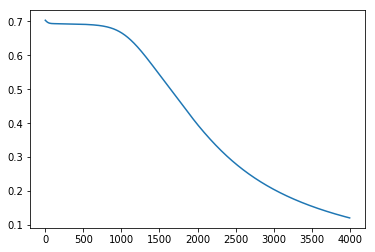

In [7]:
plt.plot(h.history['loss'])

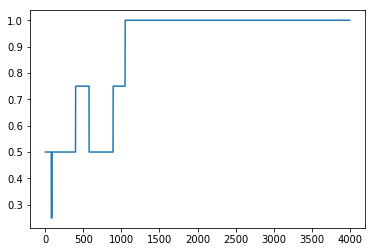

In [9]:
plt.plot(h.history['acc'])

In [16]:
model.predict(x=np.array([[1, 0],[1, 1], [0, 1]]))

array([[0.88261825],
       [0.18607672],
       [0.895126  ]], dtype=float32)

In [ ]:
"""
Logic gates using tensorflow neural network with one layer
"""
import datetime
from pathlib import Path
import tensorflow as tf

input_layer = tf.placeholder("float", shape=[None, 2], name="input_1")
target = tf.placeholder("float", shape=[None, 1], name="output")
input_bias = tf.Variable(initial_value=tf.random_normal(shape=[3], stddev=0.4),
                         dtype="float", name="input_bias")
weight = tf.Variable(initial_value=tf.random_normal(shape=[2, 3], stddev=0.4),
                     dtype="float", name="hidden_weight_1")

hidden_weight_1 = tf.Variable(initial_value=tf.random_normal(shape=[3, 3], stddev=0.4),
                            dtype="float", name="hidden_weight_1")
output_weight = tf.Variable(initial_value=tf.random_normal(shape=[3, 1], stddev=0.4),
                            dtype="float", name="output")
hidden_bias = tf.Variable(initial_value=tf.random_normal(shape=[1], stddev=0.4),
                          dtype="float", name="hidden_bias")
tf.summary.histogram(name="input_weight",values=weight)
tf.summary.histogram(name="output_weight",values=output_weight)

hidden_layer = tf.sigmoid(tf.matmul(input_layer, weight) + input_bias)
output_layer = tf.sigmoid(tf.matmul(hidden_layer, output_weight) + hidden_bias, name="output")

cost = tf.squared_difference(target, output_layer)
cost = tf.reduce_mean(cost)
tf.summary.scalar("error", cost)
optimizer = tf.train.AdamOptimizer().minimize(cost)

inp = [[1,1],[1,0],[0,1],[0,0]]
out = [[0],[1],[1],[0]]
epoches = 4000
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    merged_summary = tf.summary.merge_all()
    file_name = Path("./temp_logs/", "tensor_log_"
                     + datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S") + ".log")
    tf_writer = tf.summary.FileWriter(str(file_name), sess.graph)
    for i in range(epoches):
        err, _, summary_output = sess.run([cost, optimizer, merged_summary],feed_dict={input_layer:inp, target:out})
        print(i, err)
        tf_writer.add_summary(summary_output, i)
    inp = [[0, 0]]
    while True:
        inp[0][0] = input()
        inp[0][1] = input()
        print(sess.run([output_layer], feed_dict={input_layer: inp})[0][0])

0 0.25138772
1 0.251324
2 0.25126168
3 0.2512008
4 0.25114137
5 0.25108343
6 0.251027
7 0.25097206
8 0.25091866
9 0.25086677
10 0.25081646
11 0.2507677
12 0.2507205
13 0.25067487
14 0.2506308
15 0.2505883
16 0.25054735
17 0.25050795
18 0.25047004
19 0.25043368
20 0.25039878
21 0.2503654
22 0.2503335
23 0.25030303
24 0.25027394
25 0.25024626
26 0.25021988
27 0.25019485
28 0.2501711
29 0.2501486
30 0.25012726
31 0.25010717
32 0.2500882
33 0.2500703
34 0.25005344
35 0.2500376
36 0.25002277
37 0.25000882
38 0.24999583
39 0.24998364
40 0.24997228
41 0.24996167
42 0.24995182
43 0.24994266
44 0.24993415
45 0.24992624
46 0.24991894
47 0.24991214
48 0.2499059
49 0.2499001
50 0.24989475
51 0.24988985
52 0.24988532
53 0.24988109
54 0.24987724
55 0.24987367
56 0.24987037
57 0.24986733
58 0.24986447
59 0.24986188
60 0.24985944
61 0.24985722
62 0.24985509
63 0.24985312
64 0.24985127
65 0.24984953
66 0.24984783
67 0.24984628
68 0.24984477
69 0.24984334
70 0.24984194
71 0.24984062
72 0.2498393
73 0.24

585 0.23990245
586 0.23982976
587 0.23975676
588 0.23968351
589 0.23960996
590 0.23953608
591 0.23946193
592 0.23938748
593 0.23931274
594 0.23923774
595 0.23916242
596 0.23908682
597 0.23901093
598 0.23893476
599 0.23885831
600 0.23878157
601 0.23870455
602 0.23862724
603 0.23854965
604 0.2384718
605 0.23839365
606 0.23831522
607 0.23823652
608 0.23815756
609 0.2380783
610 0.23799874
611 0.23791896
612 0.23783885
613 0.23775853
614 0.2376779
615 0.237597
616 0.23751584
617 0.23743443
618 0.23735271
619 0.23727076
620 0.23718855
621 0.23710604
622 0.23702328
623 0.23694025
624 0.23685697
625 0.23677343
626 0.23668964
627 0.23660557
628 0.23652124
629 0.23643665
630 0.23635185
631 0.23626675
632 0.23618141
633 0.2360958
634 0.23600996
635 0.23592386
636 0.23583752
637 0.23575094
638 0.23566407
639 0.23557699
640 0.23548962
641 0.23540205
642 0.23531422
643 0.23522614
644 0.23513784
645 0.23504926
646 0.23496047
647 0.23487145
648 0.23478216
649 0.23469265
650 0.23460288
651 0.23451291
6

1154 0.17348275
1155 0.17335232
1156 0.17322192
1157 0.17309153
1158 0.1729612
1159 0.17283088
1160 0.17270064
1161 0.17257044
1162 0.17244022
1163 0.17231008
1164 0.17217998
1165 0.1720499
1166 0.17191988
1167 0.17178988
1168 0.17165993
1169 0.17153004
1170 0.17140017
1171 0.17127033
1172 0.17114054
1173 0.17101076
1174 0.17088106
1175 0.17075142
1176 0.17062181
1177 0.17049219
1178 0.17036265
1179 0.17023316
1180 0.17010371
1181 0.1699743
1182 0.16984493
1183 0.16971561
1184 0.16958632
1185 0.16945711
1186 0.16932791
1187 0.16919872
1188 0.16906968
1189 0.1689406
1190 0.16881157
1191 0.16868263
1192 0.16855368
1193 0.1684248
1194 0.16829598
1195 0.1681672
1196 0.16803849
1197 0.16790979
1198 0.16778111
1199 0.16765253
1200 0.16752402
1201 0.16739553
1202 0.16726705
1203 0.16713865
1204 0.16701029
1205 0.166882
1206 0.16675375
1207 0.16662553
1208 0.1664974
1209 0.16636929
1210 0.16624123
1211 0.16611323
1212 0.16598529
1213 0.1658574
1214 0.16572954
1215 0.16560173
1216 0.16547397
12

1690 0.1128155
1691 0.11272284
1692 0.11263022
1693 0.11253765
1694 0.11244519
1695 0.112352796
1696 0.11226049
1697 0.11216826
1698 0.11207613
1699 0.11198403
1700 0.111892045
1701 0.11180011
1702 0.11170831
1703 0.1116165
1704 0.11152483
1705 0.11143324
1706 0.111341655
1707 0.111250184
1708 0.11115882
1709 0.1110675
1710 0.110976264
1711 0.11088513
1712 0.11079406
1713 0.11070308
1714 0.110612124
1715 0.1105213
1716 0.11043051
1717 0.110339805
1718 0.11024919
1719 0.11015864
1720 0.11006819
1721 0.1099778
1722 0.10988748
1723 0.10979725
1724 0.10970704
1725 0.109617
1726 0.10952696
1727 0.10943703
1728 0.109347165
1729 0.10925743
1730 0.109167695
1731 0.10907804
1732 0.10898849
1733 0.10889903
1734 0.10880961
1735 0.10872029
1736 0.10863101
1737 0.10854184
1738 0.10845275
1739 0.10836373
1740 0.10827479
1741 0.10818591
1742 0.10809709
1743 0.10800839
1744 0.10791975
1745 0.10783114
1746 0.10774267
1747 0.10765424
1748 0.10756591
1749 0.10747763
1750 0.10738942
1751 0.1073013
1752 0.

2231 0.072825074
2232 0.072767645
2233 0.072710276
2234 0.07265298
2235 0.072595716
2236 0.0725385
2237 0.07248137
2238 0.07242428
2239 0.07236722
2240 0.07231021
2241 0.07225325
2242 0.07219636
2243 0.07213956
2244 0.07208274
2245 0.072026014
2246 0.07196931
2247 0.07191269
2248 0.07185609
2249 0.07179954
2250 0.07174307
2251 0.07168663
2252 0.07163026
2253 0.07157391
2254 0.07151764
2255 0.07146141
2256 0.071405254
2257 0.071349084
2258 0.07129304
2259 0.07123703
2260 0.071181044
2261 0.071125135
2262 0.071069255
2263 0.07101344
2264 0.070957676
2265 0.07090196
2266 0.07084626
2267 0.07079065
2268 0.07073507
2269 0.07067953
2270 0.07062411
2271 0.07056865
2272 0.07051331
2273 0.07045798
2274 0.07040276
2275 0.07034748
2276 0.070292324
2277 0.07023723
2278 0.07018216
2279 0.07012717
2280 0.07007216
2281 0.07001726
2282 0.069962375
2283 0.06990759
2284 0.0698528
2285 0.06979814
2286 0.069743425
2287 0.0696888
2288 0.06963426
2289 0.06957972
2290 0.06952527
2291 0.06947083
2292 0.069416

2775 0.048129715
2776 0.04809446
2777 0.048059218
2778 0.04802402
2779 0.047988847
2780 0.0479537
2781 0.04791861
2782 0.04788354
2783 0.04784849
2784 0.047813483
2785 0.047778495
2786 0.047743537
2787 0.047708612
2788 0.047673732
2789 0.047638856
2790 0.047604036
2791 0.047569238
2792 0.04753446
2793 0.04749972
2794 0.04746503
2795 0.04743034
2796 0.047395676
2797 0.04736106
2798 0.04732649
2799 0.047291927
2800 0.047257397
2801 0.04722289
2802 0.04718843
2803 0.047154006
2804 0.047119588
2805 0.047085207
2806 0.04705085
2807 0.047016542
2808 0.046982262
2809 0.046947986
2810 0.046913747
2811 0.046879556
2812 0.046845388
2813 0.046811245
2814 0.046777137
2815 0.046743087
2816 0.046709016
2817 0.04667497
2818 0.04664099
2819 0.046607047
2820 0.046573117
2821 0.046539214
2822 0.046505347
2823 0.046471495
2824 0.046437707
2825 0.046403892
2826 0.04637014
2827 0.046336427
2828 0.04630275
2829 0.046269055
2830 0.046235427
2831 0.046201818
2832 0.04616824
2833 0.04613469
2834 0.046101153
28

3295 0.033335406
3296 0.033312712
3297 0.03329006
3298 0.033267424
3299 0.033244807
3300 0.033222213
3301 0.033199623
3302 0.033177048
3303 0.033154503
3304 0.03313198
3305 0.033109464
3306 0.03308697
3307 0.03306448
3308 0.033042036
3309 0.03301958
3310 0.032997176
3311 0.032974765
3312 0.03295241
3313 0.032930028
3314 0.03290766
3315 0.032885324
3316 0.032863025
3317 0.03284074
3318 0.03281848
3319 0.0327962
3320 0.03277396
3321 0.03275177
3322 0.032729547
3323 0.032707375
3324 0.032685183
3325 0.032663047
3326 0.032640904
3327 0.032618806
3328 0.032596722
3329 0.032574642
3330 0.032552585
3331 0.03253054
3332 0.03250852
3333 0.032486513
3334 0.032464527
3335 0.03244255
3336 0.032420628
3337 0.032398686
3338 0.032376762
3339 0.03235486
3340 0.032332994
3341 0.032311115
3342 0.032289285
3343 0.03226746
3344 0.03224566
3345 0.032223865
3346 0.03220208
3347 0.032180306
3348 0.032158587
3349 0.03213689
3350 0.03211518
3351 0.032093488
3352 0.03207182
3353 0.032050185
3354 0.032028556
335

3856 0.023076247
3857 0.023061672
3858 0.023047097
3859 0.023032535
3860 0.023017976
3861 0.02300344
3862 0.02298892
3863 0.02297438
3864 0.022959884
3865 0.022945378
3866 0.022930916
3867 0.022916436
3868 0.022901973
3869 0.02288751
3870 0.022873078
3871 0.022858627
3872 0.022844227
3873 0.022829797
3874 0.0228154
3875 0.022801047
3876 0.022786645
3877 0.022772297
3878 0.022757921
3879 0.022743573
3880 0.022729255
3881 0.022714907
3882 0.022700619
3883 0.022686312
3884 0.022672016
3885 0.022657733
3886 0.022643477
3887 0.02262921
3888 0.02261496
3889 0.022600733
3890 0.022586498
3891 0.022572273
3892 0.022558082
3893 0.02254389
3894 0.022529703
3895 0.022515528
3896 0.022501376
3897 0.022487229
3898 0.022473073
3899 0.022458948
3900 0.022444826
3901 0.022430722
3902 0.022416627
3903 0.022402544
3904 0.02238847
3905 0.0223744
3906 0.022360347
3907 0.022346286
3908 0.022332259
3909 0.02231824
3910 0.02230421
3911 0.022290196
3912 0.022276219
3913 0.022262227
3914 0.022248257
3915 0.0222